<a href="https://colab.research.google.com/github/OMWANDHOJR/Kaggle-Competition/blob/main/House_prices_10_4._2ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic data set.

Dealing with Outliers


In [1]:
!pip install catboost

In [205]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import ElasticNet, LinearRegression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error



In [83]:
Test_df = pd.read_csv('/kaggle/test.csv')
Train_df = pd.read_csv('/kaggle/train.csv')

Test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
Train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
Train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
Train_df.dtypes[Train_df.dtypes == 'object']

,0
MSZoning,object
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object
LandSlope,object
Neighborhood,object
Condition1,object


In [7]:
Train_df.dtypes[Train_df.dtypes != 'object']

,0
Id,int64
MSSubClass,int64
LotFrontage,float64
LotArea,int64
OverallQual,int64
OverallCond,int64
YearBuilt,int64
YearRemodAdd,int64
MasVnrArea,float64
BsmtFinSF1,int64


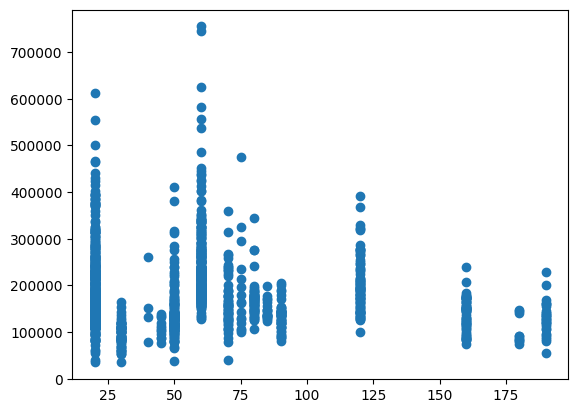

In [8]:
plt.scatter(x='MSSubClass', y='SalePrice', data=Train_df)

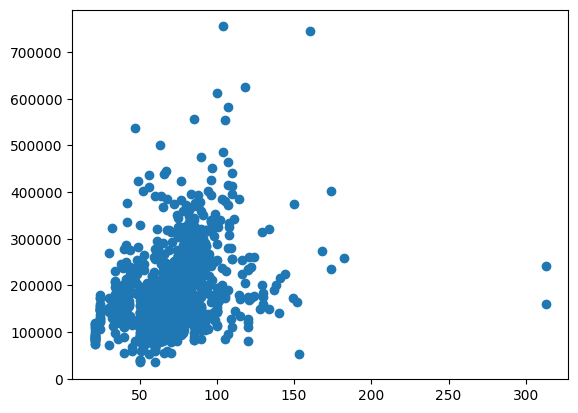

In [9]:
plt.scatter(x='LotFrontage', y='SalePrice', data=Train_df)

In [10]:
Train_df.query('LotFrontage > 300')

#drop 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


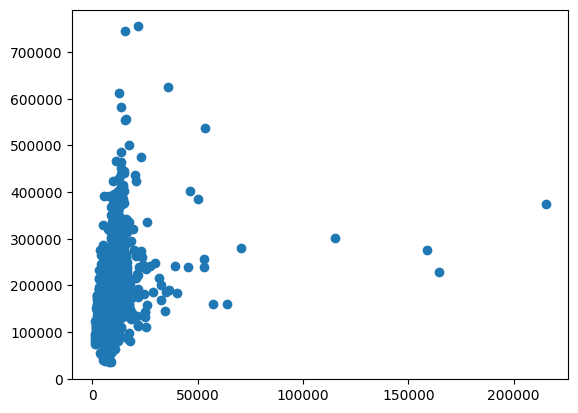

In [11]:
plt.scatter(x='LotArea', y='SalePrice', data=Train_df)

In [12]:
Train_df.query('LotArea > 60000')

#drop 250, 314, 336, 707

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


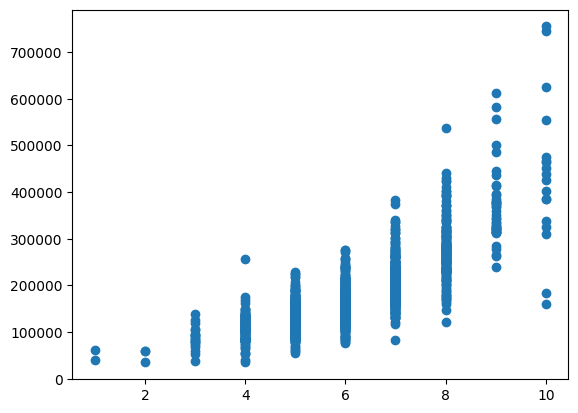

In [13]:
plt.scatter(x='OverallQual', y='SalePrice', data=Train_df)

#drop 524

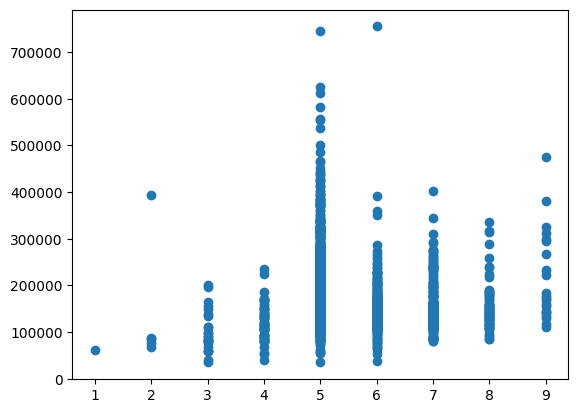

In [14]:
plt.scatter(x='OverallCond', y='SalePrice', data=Train_df)

In [15]:
Train_df.query('OverallCond == 6 ').sort_values(by='SalePrice')

#drop 379, 1183, 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
968,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900
710,711,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,52000
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500
874,875,50,RM,52.0,5720,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,66500
29,30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1025,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml,287000
654,655,20,RL,91.0,10437,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,350000
608,609,70,RL,78.0,12168,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Alloca,359100
688,689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,392000


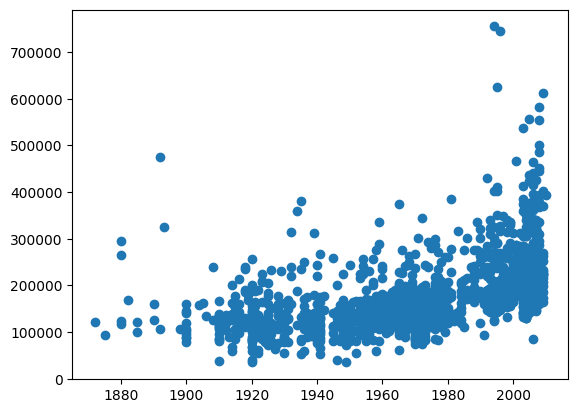

In [16]:
plt.scatter(x='YearBuilt', y='SalePrice', data=Train_df)

In [17]:
Train_df.query('YearBuilt > 1980 & SalePrice > 600000 ')

#drop 186, 692, 899, 1179, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


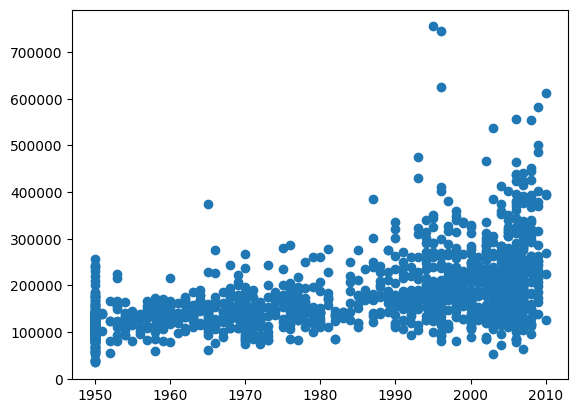

In [18]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=Train_df)

In [19]:
Train_df.query('YearRemodAdd > 1990 & SalePrice > 600000 ')

#drop 692, 1183, 186, 314


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


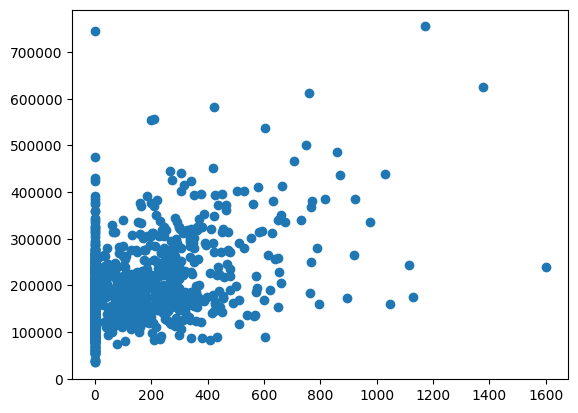

In [20]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=Train_df)

In [21]:
Train_df.query('MasVnrArea > 1500 ')

#drop 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


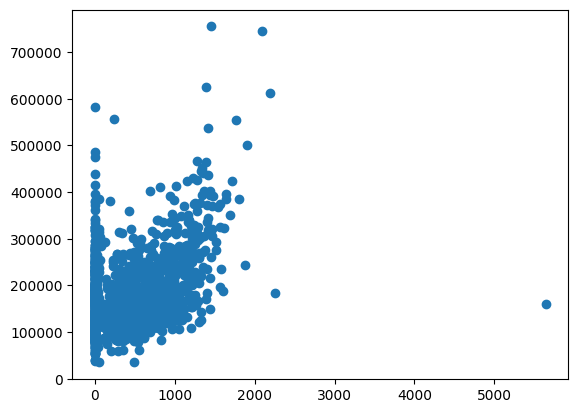

In [22]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=Train_df)

In [23]:
Train_df.query('BsmtFinSF1 > 5000 ')

#drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


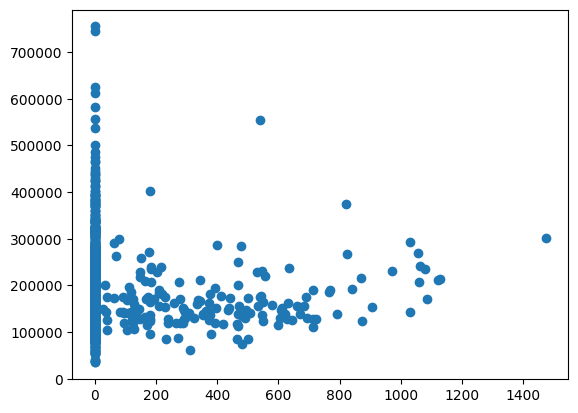

In [24]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=Train_df)

In [25]:
Train_df.query('BsmtFinSF2 > 1400 ')

#drop 323

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


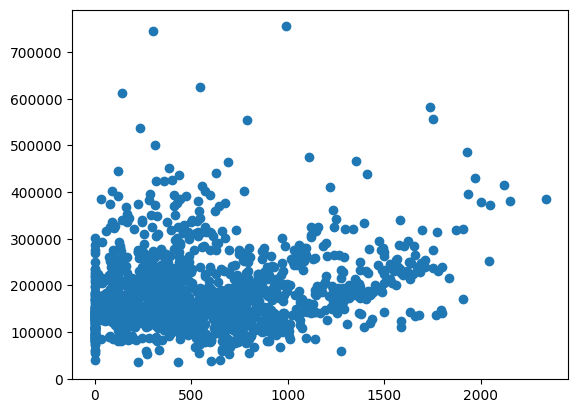

In [26]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=Train_df)

In [27]:
Train_df.query('BsmtUnfSF < 1500 & SalePrice > 700000 ')

#drop 692, 1183


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


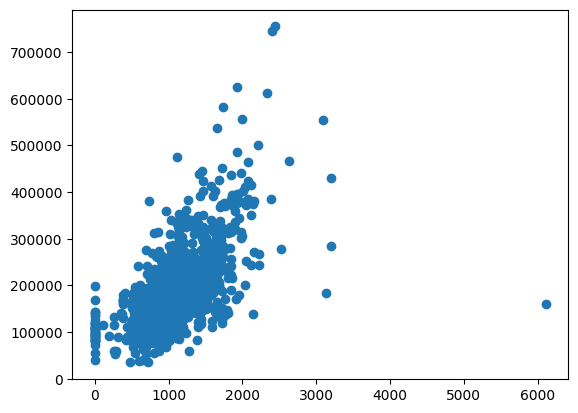

In [28]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=Train_df)

In [29]:
Train_df.query('TotalBsmtSF > 4000 ')

#drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


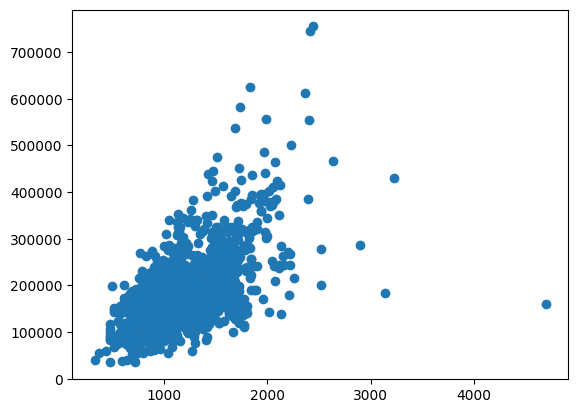

In [30]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=Train_df)

In [31]:


Train_df.query('`1stFlrSF` > 4000')

#drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


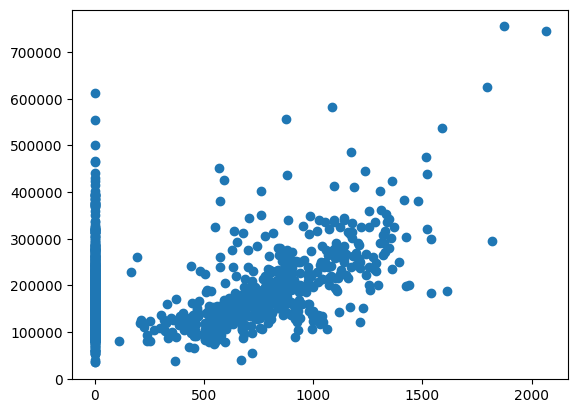

In [32]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=Train_df)

In [33]:
Train_df.query('`2ndFlrSF` > 1700 & SalePrice > 700000')

#drop 692, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


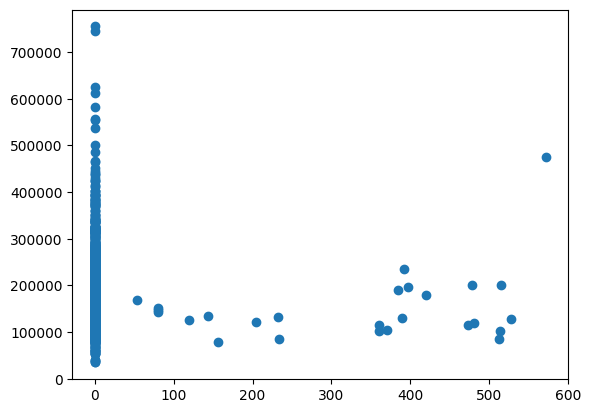

In [34]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=Train_df)

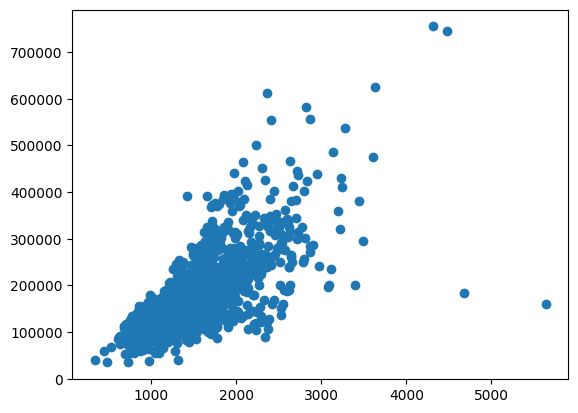

In [35]:
plt.scatter(x='GrLivArea', y='SalePrice', data=Train_df)

In [36]:
Train_df.query('GrLivArea > 4000 & SalePrice < 200000')

#drop 1299, 524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


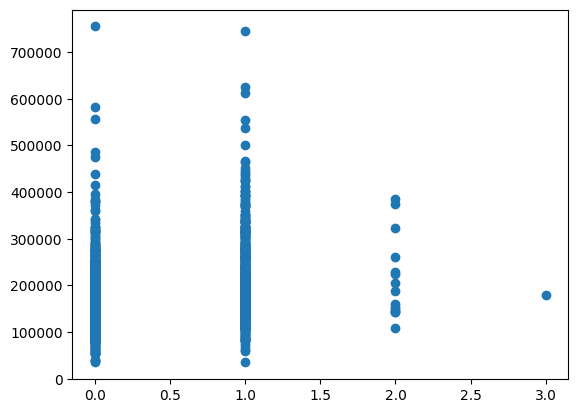

In [37]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=Train_df)

In [38]:
Train_df.query('BsmtFullBath == 3 ')

#drop 692, 1183, 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


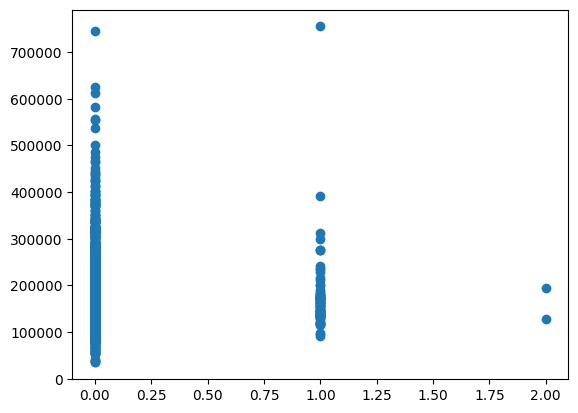

In [39]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=Train_df)

In [40]:
Train_df.query('BsmtHalfBath == 2 ')

#drop  1183, 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


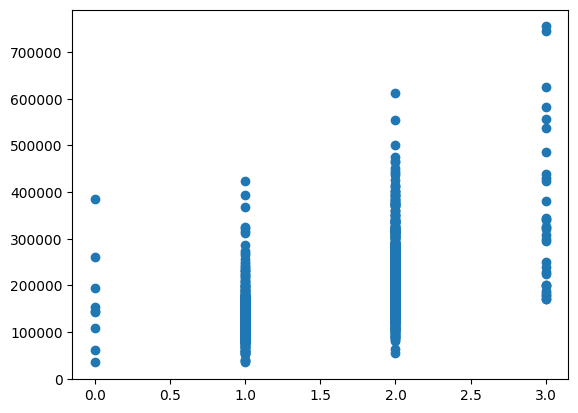

In [41]:
plt.scatter(x='FullBath', y='SalePrice', data=Train_df)

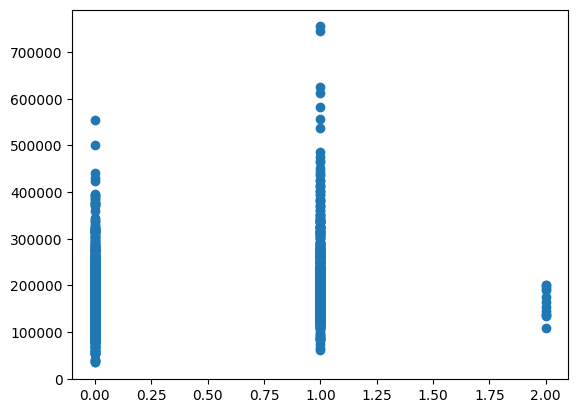

In [42]:
plt.scatter(x='HalfBath', y='SalePrice', data=Train_df)

In [43]:
Train_df.query('HalfBath == 1 & SalePrice > 700000 ')

#drop 1183, 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


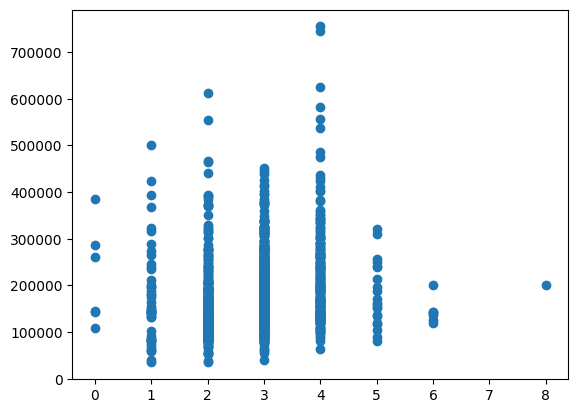

In [44]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=Train_df)

In [45]:
Train_df.query('BedroomAbvGr == 4 & SalePrice > 700000 ')

#drop 1183, 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


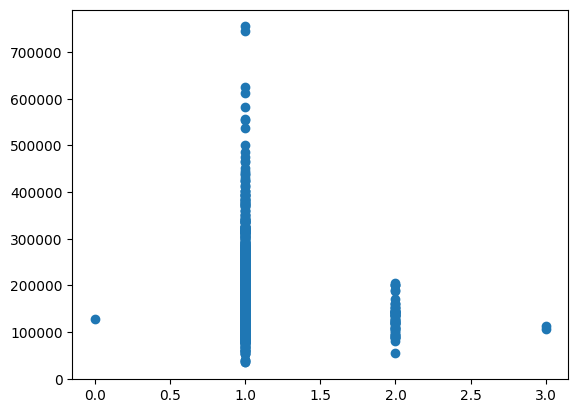

In [46]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=Train_df)

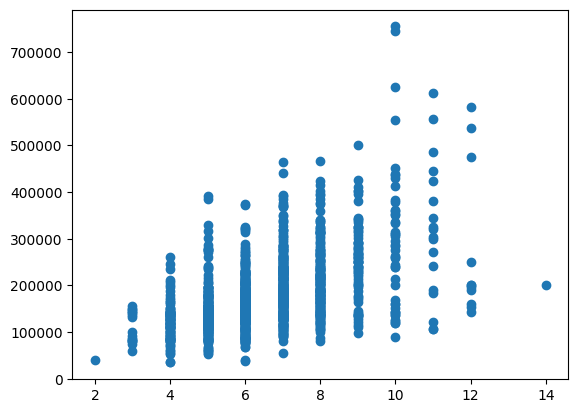

In [47]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=Train_df)

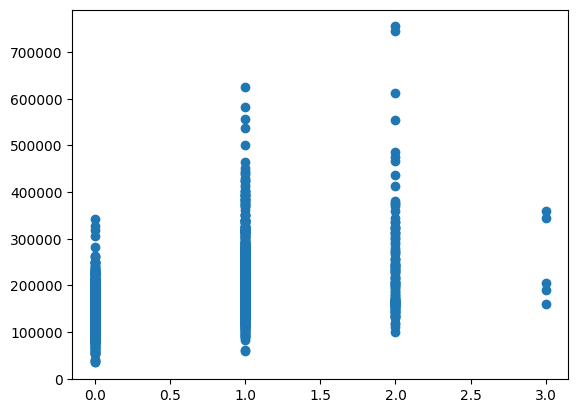

In [48]:
plt.scatter(x='Fireplaces', y='SalePrice', data=Train_df)

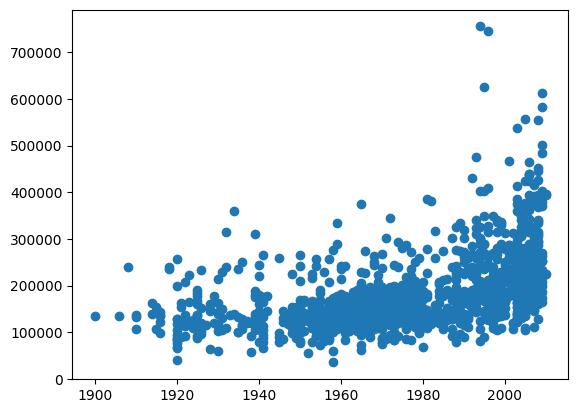

In [49]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=Train_df)

In [50]:
Train_df.query('GarageYrBlt < 2000 & SalePrice > 600000 ')

#drop 1183, 1170

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


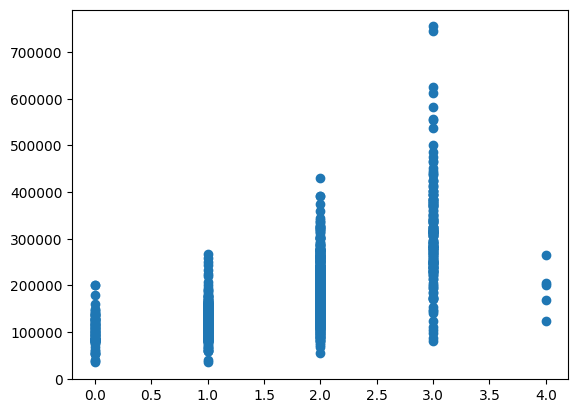

In [51]:
plt.scatter(x='GarageCars', y='SalePrice', data=Train_df)

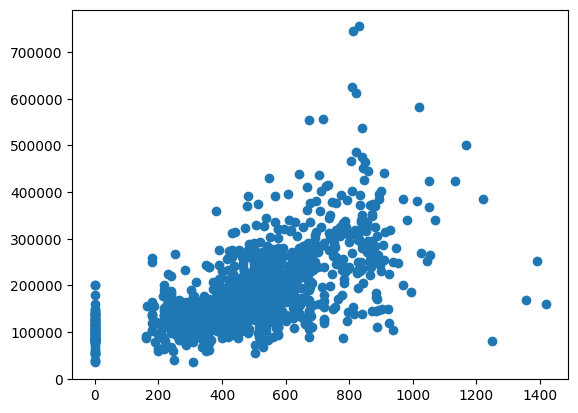

In [52]:
plt.scatter(x='GarageArea', y='SalePrice', data=Train_df)

In [53]:
Train_df.query('GarageArea > 1400')

#drop 1062, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


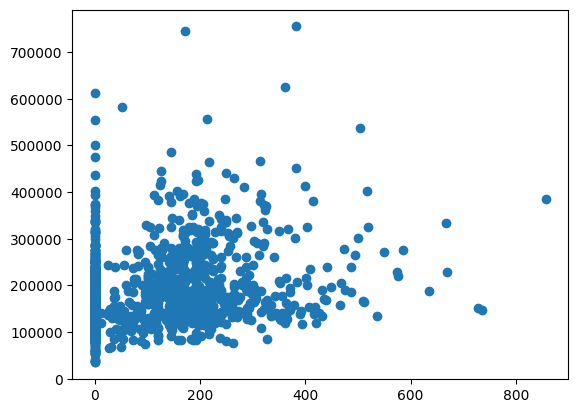

In [54]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=Train_df)

In [55]:
Train_df.query('WoodDeckSF > 800')

#drop 54

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


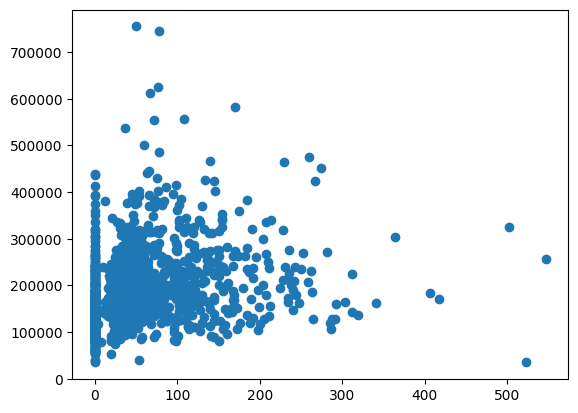

In [56]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=Train_df)

In [57]:
Train_df.query('OpenPorchSF > 500')

#drop 1329, 584, 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


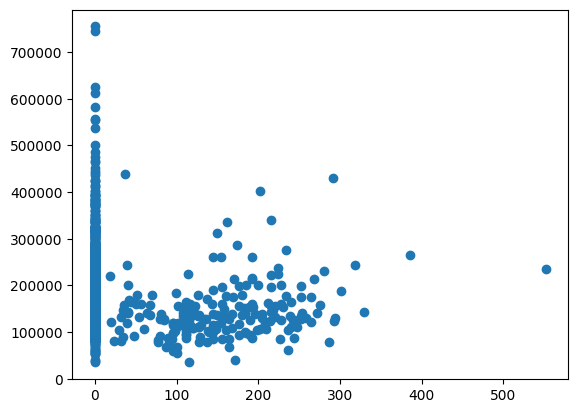

In [58]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=Train_df)

In [59]:
Train_df.query('EnclosedPorch > 500')

#drop 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


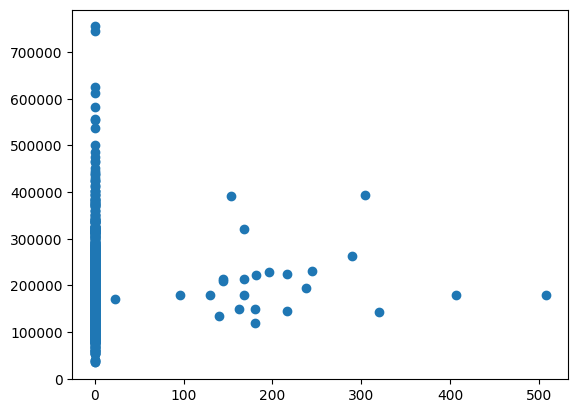

In [60]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=Train_df)

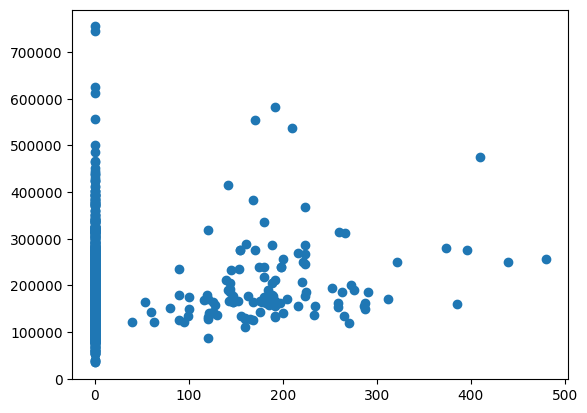

In [61]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=Train_df)

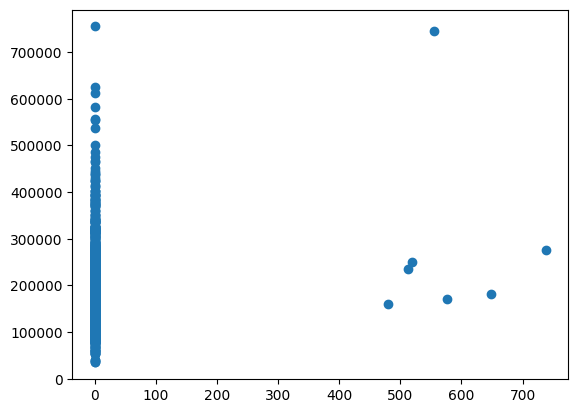

In [62]:
plt.scatter(x='PoolArea', y='SalePrice', data=Train_df)

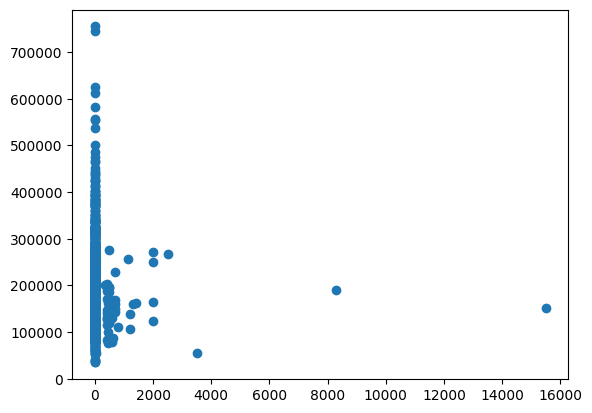

In [63]:
plt.scatter(x='MiscVal', y='SalePrice', data=Train_df)

In [64]:
Train_df.query('MiscVal > 6000')

#drop 347, 1231

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000


In [84]:
dropped_rows = [347, 1231,636, 198, 1329, 584, 496, 54, 1062,1191,496, 1299, 1183, 692, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 524 , 186, 692, 899, 1179, 1183]

In [85]:
# Convert the list to a set to remove duplicates, then back to a list
dropped_rows = list(set(dropped_rows))

print(dropped_rows)

[899, 524, 1299, 1179, 1183, 1062, 1191, 935, 1329, 692, 54, 314, 186, 707, 198, 584, 1231, 336, 347, 496, 250, 379, 636]


In [86]:
len(dropped_rows)


23

In [87]:
Train_df = Train_df[Train_df.Id.isin(dropped_rows)== False]

In [88]:
pd.DataFrame(Train_df.isnull().sum().sort_values(ascending=False), columns=['Count']).head(20)

,Count
PoolQC,1433
MiscFeature,1389
Alley,1348
Fence,1161
MasVnrType,857
FireplaceQu,686
LotFrontage,253
GarageYrBlt,79
GarageCond,79
GarageType,79


In [89]:
Train_df['Alley'].fillna('No', inplace=True)
Test_df['Alley'].fillna('No', inplace=True)

<ipython-input-89-c85076a01bb9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Train_df['Alley'].fillna('No', inplace=True)
<ipython-input-89-c85076a01bb9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

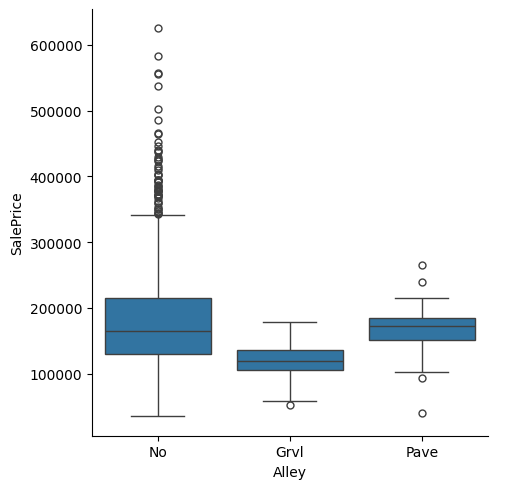

In [90]:
sns.catplot(data=Train_df, x='Alley',y= 'SalePrice', kind='box')

In [91]:
#'df.method({col: value}, inplace=True)'
Train_df.fillna({'Fence': 'no'}, inplace=True)
Test_df.fillna({'Fence': 'no'}, inplace=True)

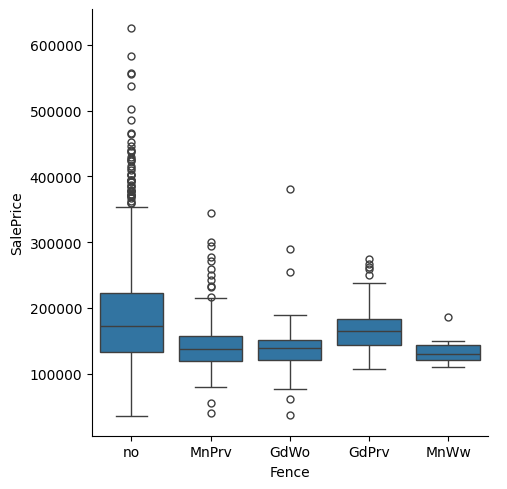

In [92]:
sns.catplot(data=Train_df, x='Fence',y= 'SalePrice', kind='box')

In [93]:
Train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [94]:

#'df.method({col: value}, inplace=True)'

Train_df.fillna({'MasVnrType': 'None'}, inplace=True)
Test_df.fillna({'MasVnrType': 'None'}, inplace=True)

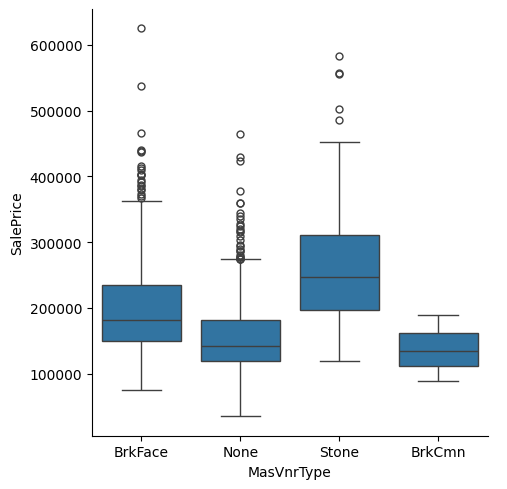

In [95]:
sns.catplot(data=Train_df, x='MasVnrType',y= 'SalePrice', kind='box')

In [96]:
Train_df.fillna({'MasVnrArea': 0}, inplace=True)
Test_df.fillna({'MasVnrArea': 0}, inplace=True)

In [97]:
Train_df.fillna({'FireplaceQu': 'No'}, inplace=True)
Test_df.fillna({'FireplaceQu': 'No'}, inplace=True)

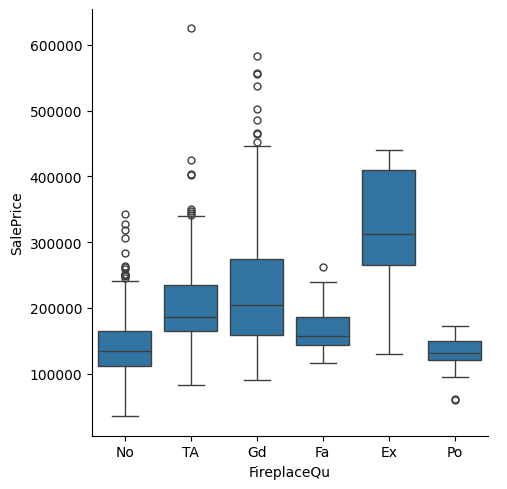

In [98]:
sns.catplot(data=Train_df, x='FireplaceQu',y= 'SalePrice', kind='box')

In [99]:
Train_df.fillna({'LotFrontage': 0}, inplace = True)
Test_df.fillna({'LotFrontage': 0}, inplace = True)

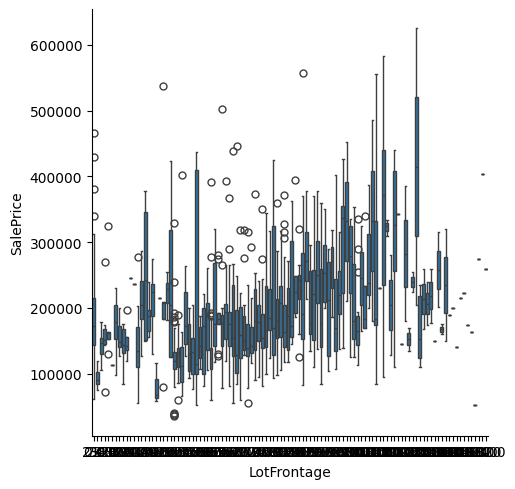

In [100]:
sns.catplot(data=Train_df, x='LotFrontage',y= 'SalePrice', kind='box')

In [101]:
Train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [102]:
Train_df.fillna({'GarageCond': 'No'}, inplace=True)
Test_df.fillna({'GarageCond': 'No'}, inplace=True)

In [103]:
Train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [104]:
Train_df.fillna({'GarageType': 'No'}, inplace=True)
Test_df.fillna({'GarageType': 'No'}, inplace=True)

In [105]:
Train_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [106]:
Train_df.fillna({'GarageFinish': 'No'}, inplace=True)
Test_df.fillna({'GarageFinish': 'No'}, inplace=True)

In [107]:
Train_df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [108]:
Train_df.fillna({'GarageQual': 'No'}, inplace=True)
Test_df.fillna({'GarageQual': 'No'}, inplace=True)

In [109]:
Train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [110]:
Train_df.fillna({'BsmtFinType2': 'No'}, inplace=True)
Test_df.fillna({'BsmtFinType2': 'No'}, inplace=True)

In [112]:
Train_df['BsmtExposure'].isnull().sum()

38

In [113]:
Train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [114]:
Train_df.fillna({'BsmtExposure': 'nan'}, inplace=True)
Test_df.fillna({'BsmtExposure': 'nan'}, inplace=True)

In [115]:
Train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [116]:
Train_df.fillna({'BsmtFinType1': 'No'}, inplace=True)
Test_df.fillna({'BsmtFinType1': 'No'}, inplace=True)

In [117]:
Train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [118]:
Train_df.fillna({'BsmtCond': 'No'}, inplace=True)
Test_df.fillna({'BsmtCond': 'No'}, inplace=True)

In [119]:
Train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [120]:
Train_df.fillna({'BsmtQual': 'No'}, inplace=True)
Test_df.fillna({'BsmtQual': 'No'}, inplace=True)

In [121]:
Train_df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [122]:
Train_df.fillna({'Electrical': 'nan'}, inplace=True)
Test_df.fillna({'Electrical': 'nan'}, inplace=True)

In [123]:
Train_df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [124]:
Train_df.fillna({'MasVnrArea': 0}, inplace=True)
Test_df.fillna({'MasVnrArea': 0}, inplace=True)

In [125]:
Train_df = Train_df.drop(columns = ['PoolQC', 'MiscFeature', 'GarageYrBlt','Alley','Fence','GarageCond','BsmtFinType2'])
Test_df = Test_df.drop(columns = ['PoolQC', 'MiscFeature', 'GarageYrBlt', 'Alley','Fence','GarageCond','BsmtFinType2'])

FEATURE ENGINEERING

In [126]:
Train_df['HouseAge'] = Train_df['YrSold'] - Train_df['YearBuilt']
Test_df['HouseAge'] = Test_df['YrSold'] - Test_df['YearBuilt']

In [127]:
Train_df['RemodAge'] = Train_df['YrSold'] - Train_df['YearRemodAdd']
Test_df['RemodAge'] = Test_df['YrSold'] - Test_df['YearRemodAdd']

In [132]:
Train_df['TotalSF'] = Train_df['BsmtFinSF1'] + Train_df['1stFlrSF'] + Train_df['2ndFlrSF'] + Train_df['BsmtFinSF2']
Test_df['TotalSF'] = Test_df['BsmtFinSF1'] + Test_df['1stFlrSF'] + Test_df['2ndFlrSF'] + Test_df['BsmtFinSF2']

In [130]:
Train_df['TotalArea'] = Train_df['GrLivArea'] + Train_df['TotalBsmtSF']
Test_df['TotalArea'] = Test_df['GrLivArea'] + Test_df['TotalBsmtSF']

In [131]:
Train_df['TotalBathrooms'] = (Train_df['FullBath'] + (0.5 * Train_df['HalfBath']) +
                               Train_df['BsmtFullBath'] + (0.5 * Train_df['BsmtHalfBath']))
Test_df['TotalBathrooms'] = (Test_df['FullBath'] + (0.5 * Test_df['HalfBath']) +
                               Test_df['BsmtFullBath'] + (0.5 * Test_df['BsmtHalfBath']))

In [133]:
Train_df = Train_df.drop(columns = ['YrSold', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF1','1stFlrSF',
                                    '2ndFlrSF','BsmtFinSF2','GrLivArea','TotalBsmtSF','FullBath','BsmtHalfBath','HalfBath'])
Test_df = Test_df.drop(columns = ['YrSold', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF1','1stFlrSF',
                                    '2ndFlrSF','BsmtFinSF2','GrLivArea','TotalBsmtSF','FullBath','BsmtHalfBath','HalfBath'])

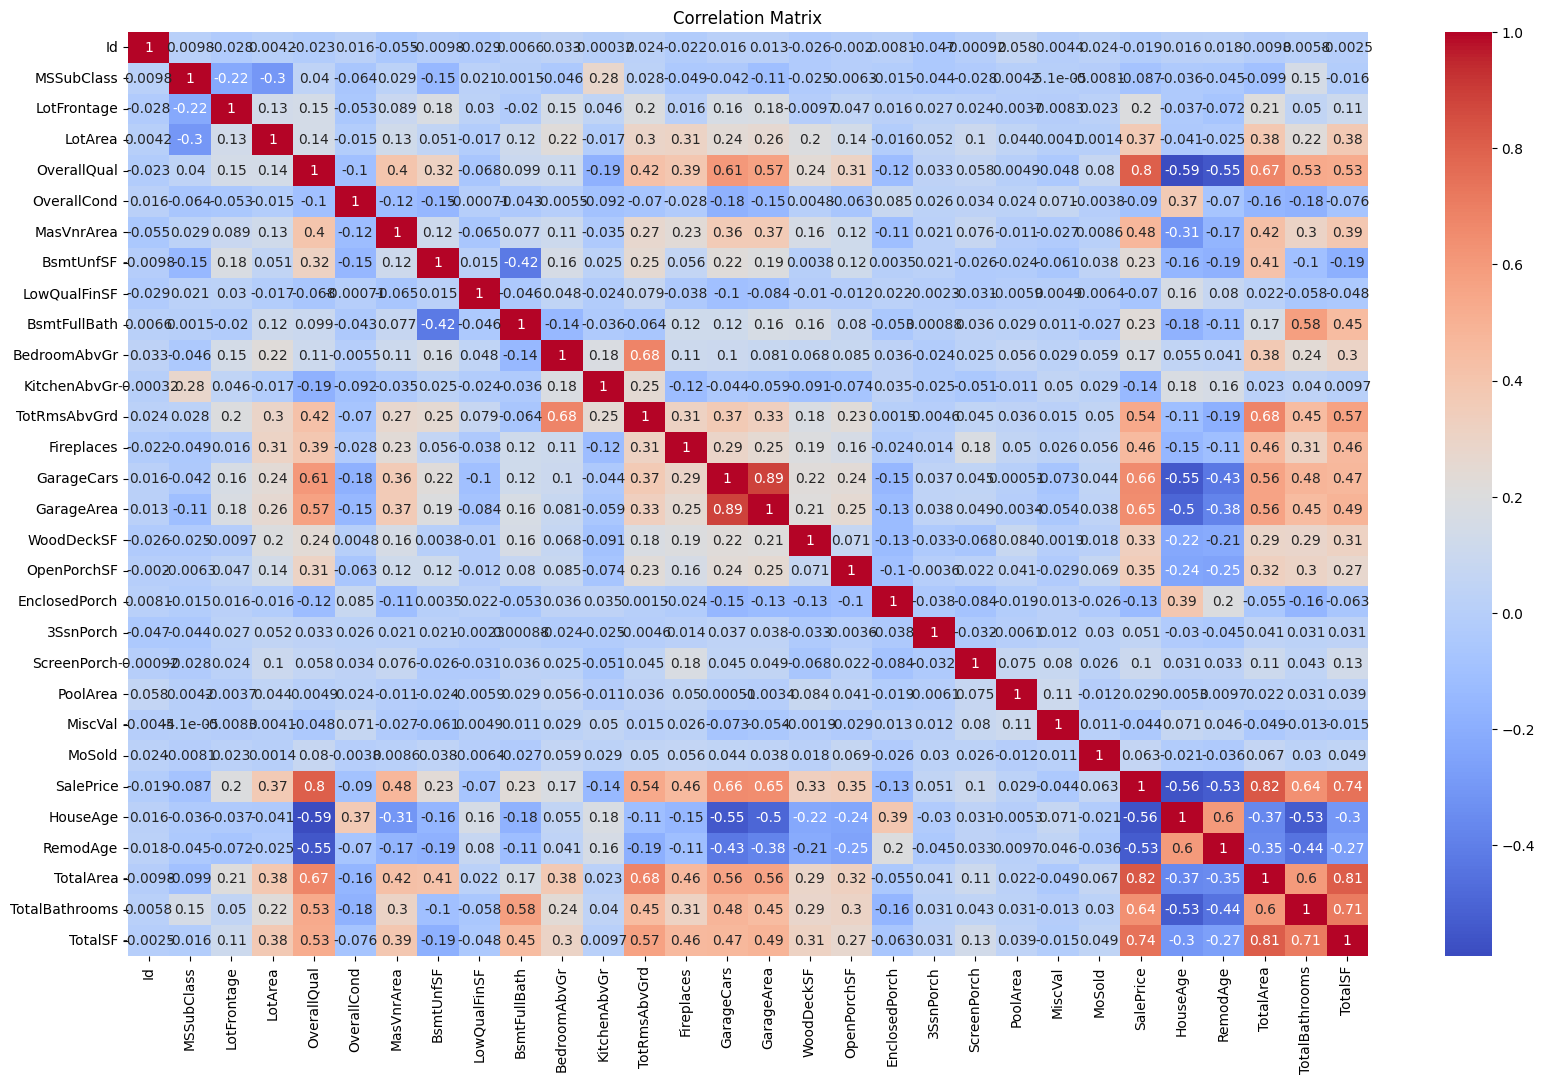

In [134]:
correlation_matrix = Train_df.corr(numeric_only= True)

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [135]:
# Calculate the correlation of numerical features with 'SalePrice'
numerical_correlations = Train_df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

# Display the correlations
print(numerical_correlations)

SalePrice         1.000000
TotalArea         0.822276
OverallQual       0.802148
TotalSF           0.742048
GarageCars        0.655877
GarageArea        0.647592
TotalBathrooms    0.638402
TotRmsAbvGrd      0.536692
MasVnrArea        0.475622
Fireplaces        0.455696
LotArea           0.366427
OpenPorchSF       0.348135
WoodDeckSF        0.331700
BsmtUnfSF         0.232143
BsmtFullBath      0.227051
LotFrontage       0.198367
BedroomAbvGr      0.173866
ScreenPorch       0.104349
MoSold            0.063398
3SsnPorch         0.050663
PoolArea          0.029415
Id               -0.018623
MiscVal          -0.044026
LowQualFinSF     -0.070466
MSSubClass       -0.087196
OverallCond      -0.089630
EnclosedPorch    -0.134102
KitchenAbvGr     -0.142968
RemodAge         -0.530005
HouseAge         -0.560461
Name: SalePrice, dtype: float64


In [137]:
Train_df['SalePrice'] = np.log1p(Train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

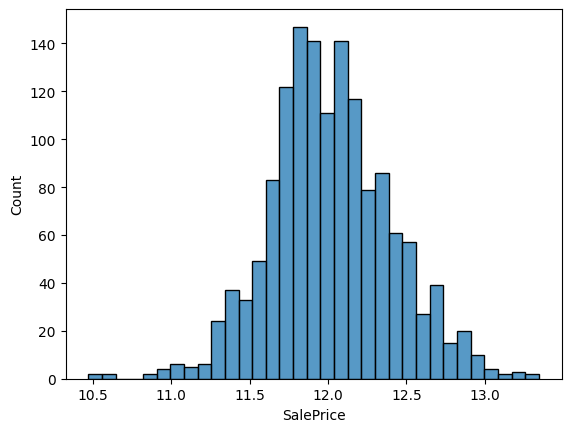

In [138]:
sns.histplot(Train_df,x=Train_df['SalePrice'])

In [139]:
Train_df.dtypes[Train_df.dtypes == 'object']

,0
MSZoning,object
Street,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object
LandSlope,object
Neighborhood,object
Condition1,object
Condition2,object


In [140]:
Train_df = Train_df.drop(columns = ['Id'])


In [141]:
num_cols = Train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = Train_df.select_dtypes(include=['object']).columns

In [142]:
num_cols = num_cols.drop('SalePrice')

In [194]:
ode_cols = ['LotShape','LandContour','Utilities','LandSlope','BsmtQual','BsmtFinType1','Functional', 'FireplaceQu'
            ,'GarageFinish','GarageQual','PavedDrive','ExterCond','ExterQual','BsmtCond', 'KitchenQual',
            'BsmtExposure']  # Removed 'BsmtFinType1' as it was duplicate and 'CentralAir' which should be in ohe_cols
ohe_cols = ['LotConfig','Street','Neighborhood','Condition1','Condition2','BldgType','MasVnrType','Foundation','Heating','HeatingQC','GarageType',
            'CentralAir', 'Electrical','SaleType','MSZoning','SaleCondition','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd']
# Make sure all these column names actually exist in your DataFrame 'X'

In [195]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [196]:
ode_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [197]:
ohe_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [198]:
col_trans= ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),],
    remainder='passthrough',
    n_jobs=-1)

In [199]:
X = Train_df.drop(columns = ['SalePrice'])
y = Train_df['SalePrice']

In [200]:
pipeline = Pipeline(steps=[
    ('col_trans', col_trans)
])

In [201]:
X_preprocessed = pipeline.fit_transform(X)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

Building **models**

In [207]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [208]:
y_pred_lr = lr.predict(X_test)

In [209]:
mean_squared_error(y_test,y_pred_lr)

0.012504861809384017

In [210]:

# Assuming 'Test_df' is your preprocessed test data and 'lr' is your trained model
# Preprocess Test_df in the same way as Train_df
Test_df_Id = Test_df['Id']  # Save id
Test_df_preprocessed = pipeline.transform(Test_df.drop(columns=['Id'])) #transform test_df after dropping id

# Generate predictions
predictions = lr.predict(Test_df_preprocessed)

# Exponentiate to reverse log1p transformation
predictions = np.expm1(predictions)

# Create a DataFrame for the predictions
submission_df = pd.DataFrame({'Id': Test_df_Id, 'SalePrice': predictions})

# Save predictions to a CSV file
submission_df.to_csv('/kaggle/submission.csv', index=False)


In [212]:
RFR = RandomForestRegressor(random_state= 13)


In [213]:
param_grid_RFR = {
    'max_depth': [None, 10, 20, 30],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [214]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [215]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [216]:
y_pred_rfr = rfr_cv.predict(X_test)

In [217]:
mean_squared_error(y_test,y_pred_rfr)

0.017262137898449034

In [219]:

# Assuming 'Test_df' is your preprocessed test data and 'lr' is your trained model
# Preprocess Test_df in the same way as Train_df
Test_df_Id = Test_df['Id']  # Save id
Test_df_preprocessed = pipeline.transform(Test_df.drop(columns=['Id'])) #transform test_df after dropping id

# Generate predictions
predictions = rfr_cv.predict(Test_df_preprocessed)

# Exponentiate to reverse log1p transformation
predictions = np.expm1(predictions)

# Create a DataFrame for the predictions
submission_df = pd.DataFrame({'Id': Test_df_Id, 'SalePrice': predictions})

# Save predictions to a CSV file
submission_df.to_csv('/kaggle/submission_rfr.csv', index=False)


